In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
%matplotlib inline
from torch.utils.data import Dataset, DataLoader
import torch
import torchvision

import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


# Generate dataset

In [2]:
y = np.random.randint(0,3,150)
idx= []
for i in range(3):
    print(i,sum(y==i))
    idx.append(y==i)

0 42
1 63
2 45


In [3]:
x = np.zeros((150,))
# x1 = np.zeros((500,2))

In [4]:
x[idx[0]] = np.random.uniform(low =-1,high =0,size= sum(idx[0]))
x[idx[1]] = np.random.uniform(low =0,high =1,size= sum(idx[1]))
x[idx[2]] = np.random.uniform(low =2,high =3,size= sum(idx[2]))
# x[idx[3],:] = np.random.normal(loc = 3)


In [5]:
# x[idx[0],:] = np.random.multivariate_normal(mean =[2,7],cov=[[0.1,0],[0,0.1]],size=sum(idx[0]))
# x1[idx[0],:] = np.random.multivariate_normal(mean = [0,-10],cov=[[0.1,0],[0,0.1]],size=sum(idx[0]))

# x[idx[1],:] = np.random.multivariate_normal(mean = [-15,-7],cov=[[0.1,0],[0,0.1]],size=sum(idx[1]))
# x1[idx[1],:] = np.random.multivariate_normal(mean = [-5,15],cov=[[0.1,0],[0,0.1]],size=sum(idx[1]))

# x[idx[2],:] = np.random.multivariate_normal(mean = [4,-2],cov=[[0.1,0],[0,0.1]],size=sum(idx[2]))
# x1[idx[2],:] = np.random.multivariate_normal(mean = [-10,0],cov=[[0.1,0],[0,0.1]],size=sum(idx[2]))


# x[idx[3],:] = np.random.multivariate_normal(mean = [-5,0],cov=[[0.1,0],[0,0.1]],size=sum(idx[3]))
# x1[idx[3],:] = np.random.multivariate_normal(mean = [-20,10],cov=[[0.1,0],[0,0.1]],size=sum(idx[3]))

# x[idx[4],:] = np.random.multivariate_normal(mean =[-8,10] ,cov=[[0.1,0],[0,0.1]],size=sum(idx[4]))
# x1[idx[4],:] = np.random.multivariate_normal(mean = [10,20],cov=[[0.1,0],[0,0.1]],size=sum(idx[4]))


# x[idx[5],:] = np.random.multivariate_normal(mean = [-15,6],cov=[[0.1,0],[0,0.1]],size=sum(idx[5]))
# x1[idx[5],:] = np.random.multivariate_normal(mean = [0,2],cov=[[0.1,0],[0,0.1]],size=sum(idx[5]))

# x[idx[6],:] = np.random.multivariate_normal(mean = [2,-18],cov=[[0.1,0],[0,0.1]],size=sum(idx[6]))
# x1[idx[6],:] = np.random.multivariate_normal(mean = [7,7],cov=[[0.1,0],[0,0.1]],size=sum(idx[6]))

# x[idx[7],:] = np.random.multivariate_normal(mean = [10,-10],cov=[[0.1,0],[0,0.1]],size=sum(idx[7]))
# x1[idx[7],:] = np.random.multivariate_normal(mean = [-8,-11],cov=[[0.1,0],[0,0.1]],size=sum(idx[7]))

# x[idx[8],:] = np.random.multivariate_normal(mean = [-10,-15],cov=[[0.1,0],[0,0.1]],size=sum(idx[8]))
# x1[idx[8],:] = np.random.multivariate_normal(mean = [10,-2],cov=[[0.1,0],[0,0.1]],size=sum(idx[8]))

# x[idx[9],:] = np.random.multivariate_normal(mean = [15,8],cov=[[0.1,0],[0,0.1]],size=sum(idx[9]))
# x1[idx[9],:] = np.random.multivariate_normal(mean = [2,20],cov=[[0.1,0],[0,0.1]],size=sum(idx[9]))

In [6]:
# x,y = np.concatenate((x,x1),axis=0),np.concatenate((y,y),axis=0)
x.shape,y.shape

((150,), (150,))

# save data

In [7]:
np.save("data_elemental/toy_gaus_mixture_input.npy",x)
np.save("data_elemental/toy_gaus_mixture_target.npy",y)


# load data

In [8]:
x = np.load("data_elemental/toy_gaus_mixture_input.npy")
y = np.load("data_elemental/toy_gaus_mixture_target.npy")
print(x.shape,y.shape)

(150,) (150,)


In [9]:
idx= []
for i in range(3):
    #print(i,sum(y==i))
    idx.append(y==i)

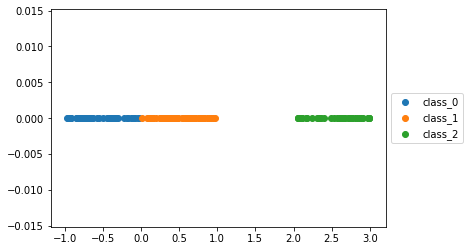

In [10]:
for i in range(3):
    y= np.zeros(x[idx[i]].shape[0])
    plt.scatter(x[idx[i]],y,label="class_"+str(i))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [11]:
foreground_classes = {'class_0','class_1'}

background_classes = {'class_2'}

In [12]:
fg_class  = np.random.randint(0,2)
fg_idx = np.random.randint(0,2)

a = []
for i in range(2):
    if i == fg_idx:
        b = np.random.choice(np.where(idx[fg_class]==True)[0],size=1)
        a.append(x[b])
        print("foreground "+str(fg_class)+" present at " + str(fg_idx))
    else:
        bg_class = np.random.randint(2,3)
        b = np.random.choice(np.where(idx[bg_class]==True)[0],size=1)
        a.append(x[b])
        print("background "+str(bg_class)+" present at " + str(i))
a = np.concatenate(a,axis=0)
#print(a.shape)

print(fg_class , fg_idx)

background 2 present at 0
foreground 1 present at 1
1 1


In [13]:
a

array([2.71835853, 0.4881006 ])

In [14]:
desired_num = 1000
mosaic_list =[]
mosaic_label = []
fore_idx=[]
for j in range(desired_num):
    fg_class  = np.random.randint(0,2)
    fg_idx = np.random.randint(0,2)
    a = []
    for i in range(2):
        if i == fg_idx:
            b = np.random.choice(np.where(idx[fg_class]==True)[0],size=1)
            a.append(x[b])
#             print("foreground "+str(fg_class)+" present at " + str(fg_idx))
        else:
            bg_class = np.random.randint(2,3)
            b = np.random.choice(np.where(idx[bg_class]==True)[0],size=1)
            a.append(x[b])
#             print("background "+str(bg_class)+" present at " + str(i))
    a = np.concatenate(a,axis=0)
    mosaic_list.append(np.reshape(a,(2,1)))
    mosaic_label.append(fg_class)
    fore_idx.append(fg_idx)

In [15]:
mosaic_list = np.concatenate(mosaic_list,axis=1).T
print(mosaic_list)

[[ 2.98764573  0.7600602 ]
 [ 0.7968102   2.88548275]
 [-0.39671376  2.05918072]
 ...
 [ 2.97700702  0.76769129]
 [ 0.25387882  2.60207752]
 [ 2.67585166 -0.03130543]]


In [16]:
print(np.shape(mosaic_label))
print(np.shape(fore_idx))

(1000,)
(1000,)


In [17]:
class MosaicDataset(Dataset):
    """MosaicDataset dataset."""
    
    
    def __init__(self, mosaic_list, mosaic_label, fore_idx):
        """
          Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.mosaic = mosaic_list
        self.label = mosaic_label
        self.fore_idx = fore_idx

    def __len__(self):
        return len(self.label)

    def __getitem__(self, idx):
        return self.mosaic[idx] , self.label[idx], self.fore_idx[idx]

batch = 250
msd = MosaicDataset(mosaic_list, mosaic_label , fore_idx)
train_loader = DataLoader( msd,batch_size= batch ,shuffle=False)

In [18]:
class Wherenet(nn.Module):
    def __init__(self):
        super(Wherenet,self).__init__()
        self.linear1 = nn.Linear(1,1)

    def forward(self,z):
        x = torch.zeros([batch,2],dtype=torch.float64)
        y = torch.zeros([batch], dtype=torch.float64)
        #x,y = x.to("cuda"),y.to("cuda")
        for i in range(2):
            x[:,i] = self.helper(z[:,i])[:,0]
            #print(k[:,0].shape,x[:,i].shape)
        x = F.softmax(x,dim=1)   # alphas
        
        #print("after network",x.shape)
        x1 = x[:,0]
        #print("alphas before",y.shape)
        for i in range(2):
            x1 = x[:,i]          
            #print(torch.mul(x1,z[:,i]).shape)
            y = y+torch.mul(x1,z[:,i])
            #print("alphas",y.shape)
        #print(y[0])
        return y[:,None] , x 

    
    def helper(self,x):
        #print(x.shape)
        x = self.linear1(x[:,None])
#         x = F.relu(self.linear2(x))
#         x = self.linear3(x)
        return x

    

In [19]:
trainiter = iter(train_loader)
input1,labels1,index1 = trainiter.next()



In [20]:
where = Wherenet().double()
where = where
out_avg,alphas = where(input1)
#out_where.shape,alphas.shape

In [21]:
out_avg.shape,alphas.shape

(torch.Size([250, 1]), torch.Size([250, 2]))

In [22]:
class Whatnet(nn.Module):
    def __init__(self):
        super(Whatnet,self).__init__()
        self.linear1 = nn.Linear(1,2)
#         self.linear2 = nn.Linear(8,16)
#         self.linear3 = nn.Linear(16,3)
    def forward(self,x):
        x = self.linear1(x)
#         x = F.relu(self.linear2(x))
#         x = self.linear3(x)
        return x

In [23]:
what =Whatnet().double()
what(out_avg)

tensor([[-0.2790, -1.2345],
        [-0.2630, -1.2553],
        [-0.7209, -0.6626],
        [-0.4118, -1.0627],
        [-0.2502, -1.2719],
        [-0.7552, -0.6181],
        [-0.3976, -1.0811],
        [-0.3369, -1.1596],
        [-0.2629, -1.2554],
        [-0.3978, -1.0808],
        [-0.4225, -1.0488],
        [-0.6115, -0.8041],
        [-0.7421, -0.6351],
        [-0.8586, -0.4844],
        [-0.8690, -0.4708],
        [-0.7135, -0.6721],
        [-0.6529, -0.7506],
        [-0.3167, -1.1858],
        [-0.2773, -1.2368],
        [-0.4605, -0.9996],
        [-0.4634, -0.9958],
        [-0.9200, -0.4049],
        [-0.7391, -0.6390],
        [-0.2497, -1.2725],
        [-0.4647, -0.9942],
        [-0.5994, -0.8198],
        [-0.4835, -0.9699],
        [-0.6566, -0.7458],
        [-0.2615, -1.2572],
        [-0.8894, -0.4445],
        [-0.8321, -0.5186],
        [-0.3880, -1.0935],
        [-0.6009, -0.8180],
        [-0.2273, -1.3015],
        [-0.7363, -0.6427],
        [-0.5931, -0

In [24]:
def disp_plot(data,avg_data,i,true_label,pred_label,alpha,true_idx):
    plt.figure(figsize=(6,6))
    data = data.numpy()
    alpha = alpha.detach().numpy()
    avg_data = avg_data.detach().numpy()
    
    #print("data",data)
    #print("avg_data",avg_data)
    #print("alpha0",alpha[0])
    #print("alpha1",alpha[1])
    x = data[:,0] 
    y = data[:,1]
    
    
    #print(inputs[0])
    #print(x)
    np.random.seed(1234)
    x1 = np.random.randint(low=0,high=10,size= x.size)
    #print("s",x)
    #print(avg_data[0])
    for i in range(0,10):
        plt.plot([x[i],y[i]],[x1[i],x1[i]],'ro-')
        plt.scatter(avg_data[i],x1[i],marker="X",linewidths=10)
        
        #print("dasfd",x[i],x1[i],y[i],x1[i],avg_data[i])

    
    
#     plt.axvline(x)
#     plt.axvline(y)
#     plt.axvline(avg_data[0])
    #plt.plot(data[0],data[1],"o",label=str(alpha[0]))
#     plt.plot(data[2],data[3],"o",label=str(alpha[1]))
#     plt.plot(data[4],data[5],"o",label=str(alpha[2]))
#     plt.plot(data[6],data[7],"o",label=str(alpha[3]))
    
    #plt.text(data[0],np.zeros(data[0].size)+0.001,str(float(alpha[0]))+"idx_0")
    #plt.text(data[1],np.zeros(data[1].size)+0.001,str(float(alpha[1]))+"idx_1")

    #plt.text(data[0]+0.2,data[1]+0.2,"0")
#     plt.text(data[2]+0.2,data[3]+0.2,"1")
#     plt.text(data[4]+0.2,data[5]+0.2,"2")
#     plt.text(data[6]+0.2,data[7]+0.2,"3")
    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

[1,     4] loss: 0.957
[1,    4] accuracy: 0.125
[2,     4] loss: 0.922
[2,    4] accuracy: 0.119
[3,     4] loss: 0.867
[3,    4] accuracy: 0.102
[4,     4] loss: 0.805
[4,    4] accuracy: 0.040
[5,     4] loss: 0.744
[5,    4] accuracy: 0.244
[6,     4] loss: 0.689
[6,    4] accuracy: 0.514
[7,     4] loss: 0.641
[7,    4] accuracy: 0.535
[8,     4] loss: 0.599
[8,    4] accuracy: 0.672
[9,     4] loss: 0.562
[9,    4] accuracy: 0.740
[10,     4] loss: 0.529
[10,    4] accuracy: 0.771
[11,     4] loss: 0.499
[11,    4] accuracy: 0.813
[12,     4] loss: 0.471
[12,    4] accuracy: 0.868
[13,     4] loss: 0.445
[13,    4] accuracy: 0.882
[14,     4] loss: 0.422
[14,    4] accuracy: 0.896
[15,     4] loss: 0.402
[15,    4] accuracy: 0.915
[16,     4] loss: 0.384
[16,    4] accuracy: 0.924
[17,     4] loss: 0.368
[17,    4] accuracy: 0.939
[18,     4] loss: 0.353
[18,    4] accuracy: 0.948
[19,     4] loss: 0.341
[19,    4] accuracy: 0.960
[20,     4] loss: 0.329
[20,    4] accuracy: 0.96

/home/dell/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


[21,     4] loss: 0.319
[21,    4] accuracy: 0.971
[22,     4] loss: 0.309
[22,    4] accuracy: 0.975
[23,     4] loss: 0.300
[23,    4] accuracy: 0.978
[24,     4] loss: 0.292
[24,    4] accuracy: 0.980
[25,     4] loss: 0.285
[25,    4] accuracy: 0.980
[26,     4] loss: 0.278
[26,    4] accuracy: 0.982
[27,     4] loss: 0.272
[27,    4] accuracy: 0.982
[28,     4] loss: 0.266
[28,    4] accuracy: 0.982
[29,     4] loss: 0.260
[29,    4] accuracy: 0.983
[30,     4] loss: 0.255
[30,    4] accuracy: 0.983
[31,     4] loss: 0.251
[31,    4] accuracy: 0.984
[32,     4] loss: 0.246
[32,    4] accuracy: 0.984
[33,     4] loss: 0.242
[33,    4] accuracy: 0.986
[34,     4] loss: 0.238
[34,    4] accuracy: 0.986
[35,     4] loss: 0.234
[35,    4] accuracy: 0.986
[36,     4] loss: 0.230
[36,    4] accuracy: 0.986
[37,     4] loss: 0.227
[37,    4] accuracy: 0.986
[38,     4] loss: 0.223
[38,    4] accuracy: 0.986
[39,     4] loss: 0.220
[39,    4] accuracy: 0.986
[40,     4] loss: 0.217
[40,   

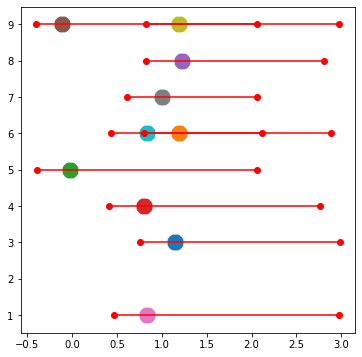

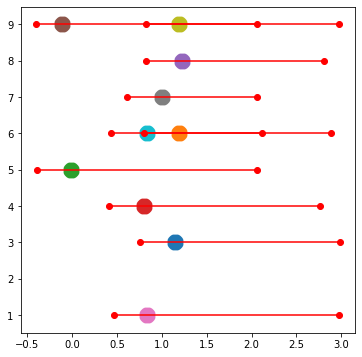

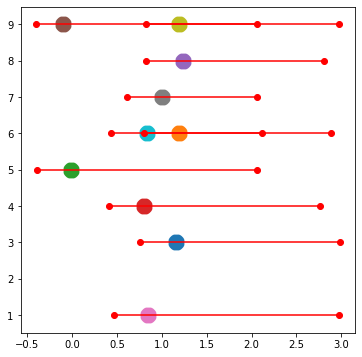

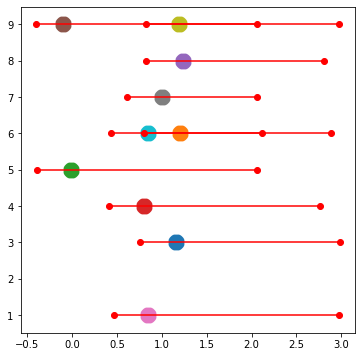

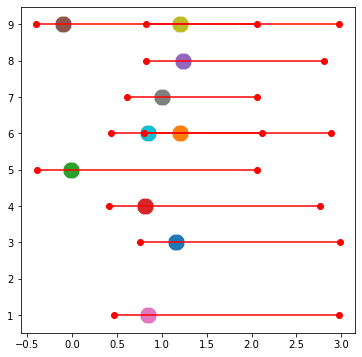

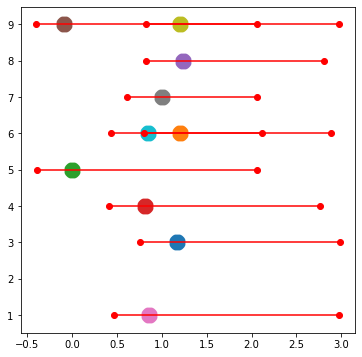

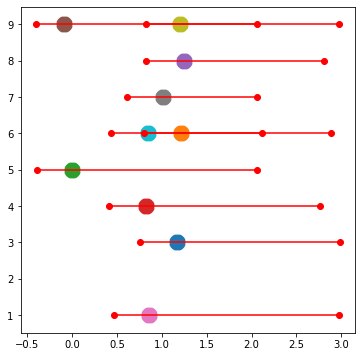

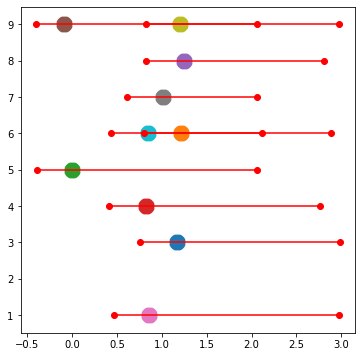

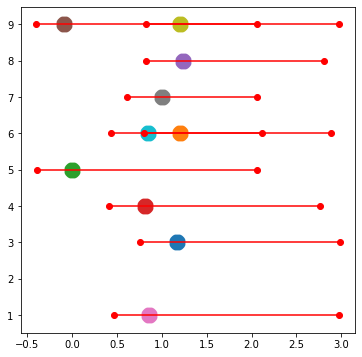

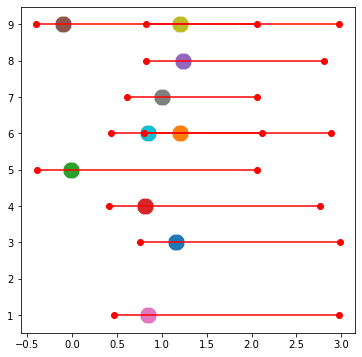

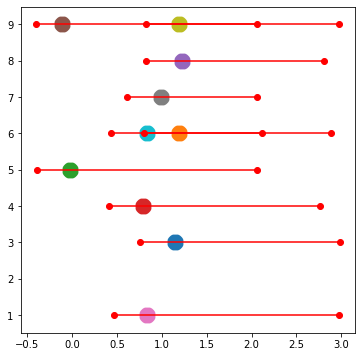

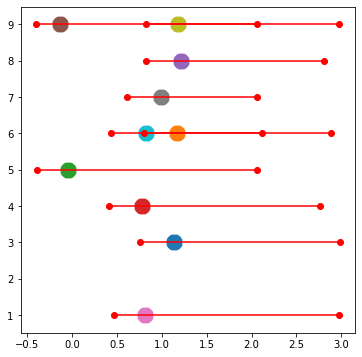

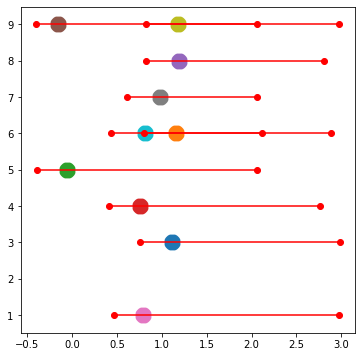

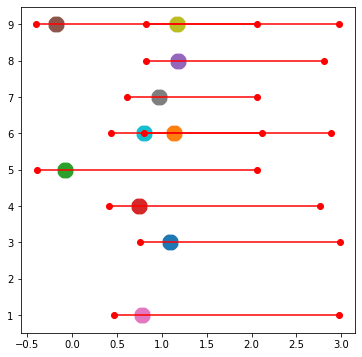

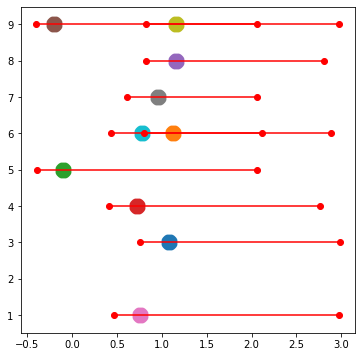

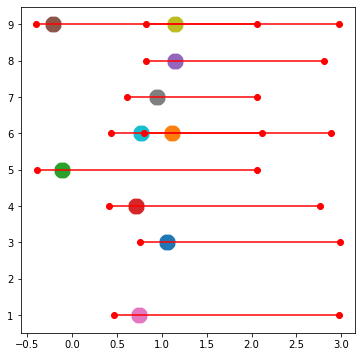

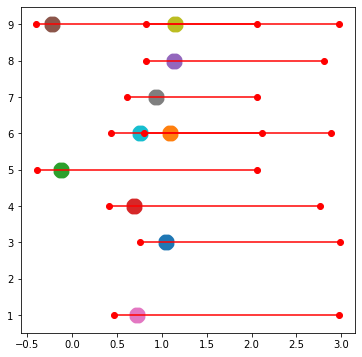

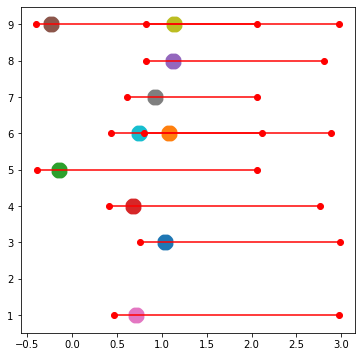

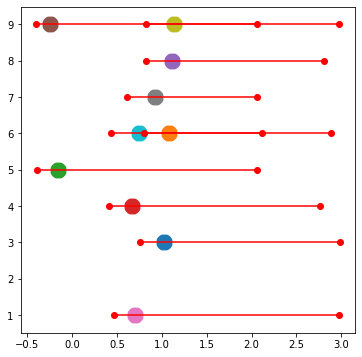

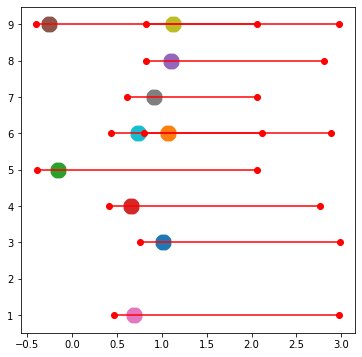

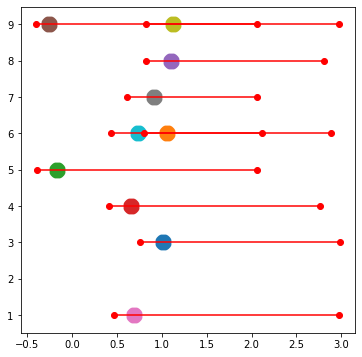

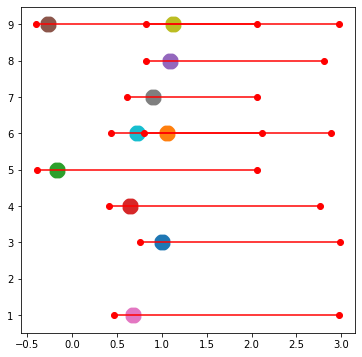

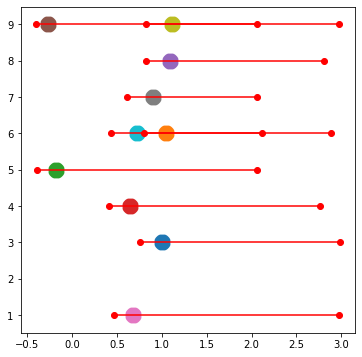

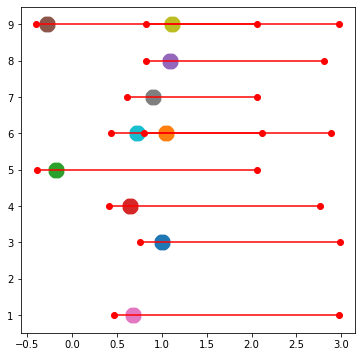

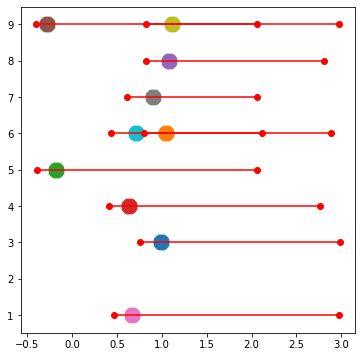

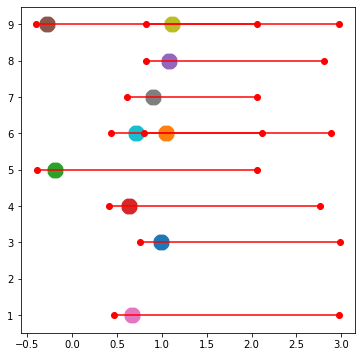

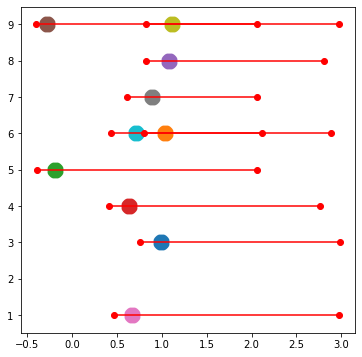

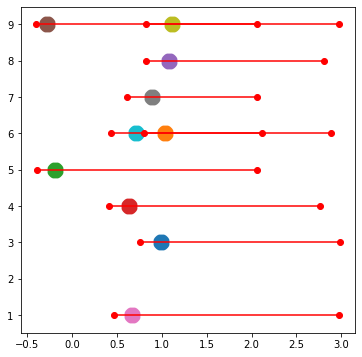

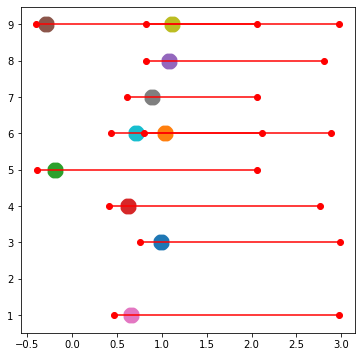

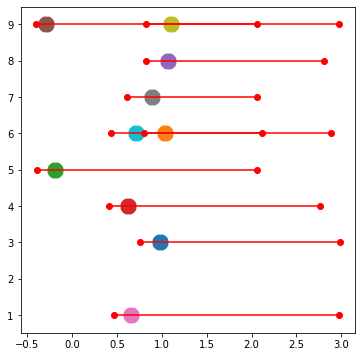

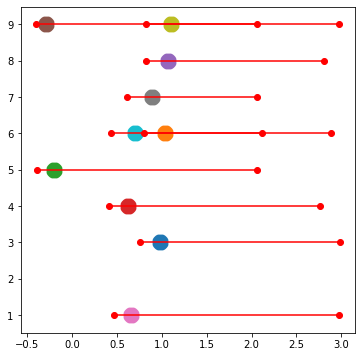

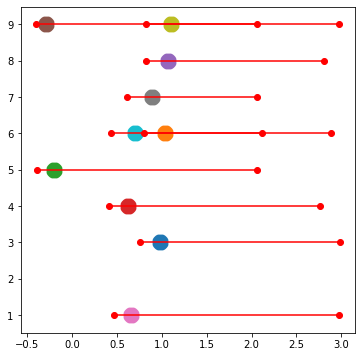

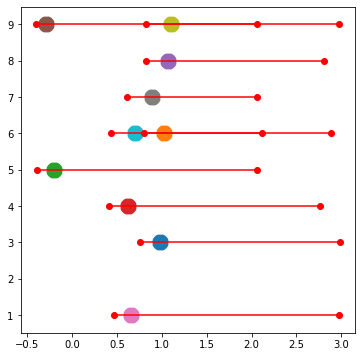

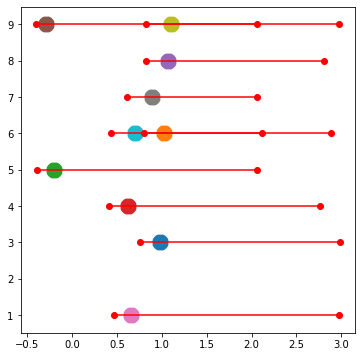

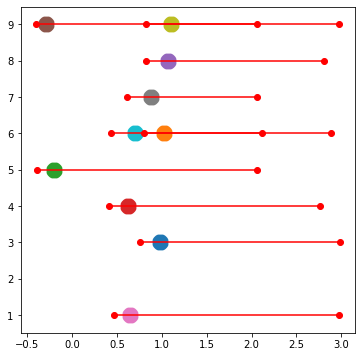

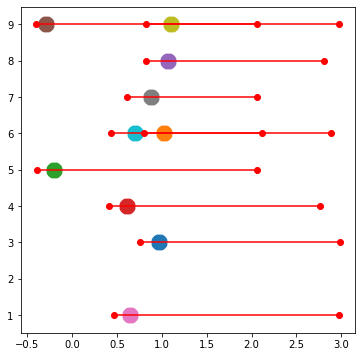

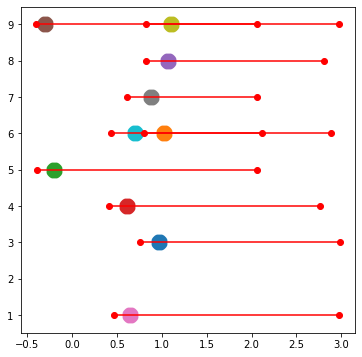

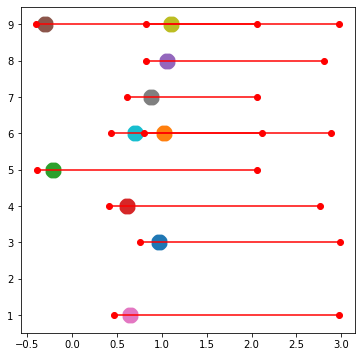

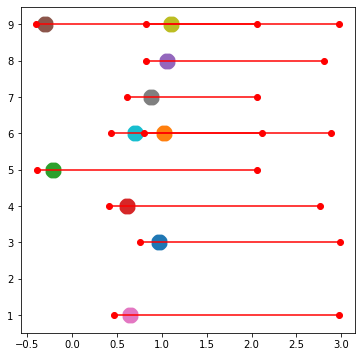

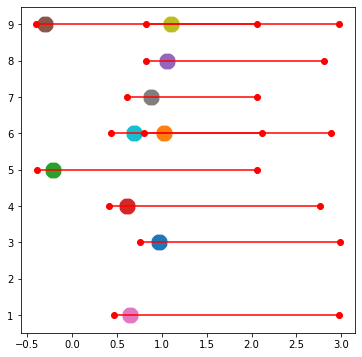

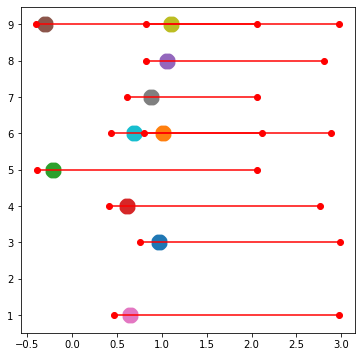

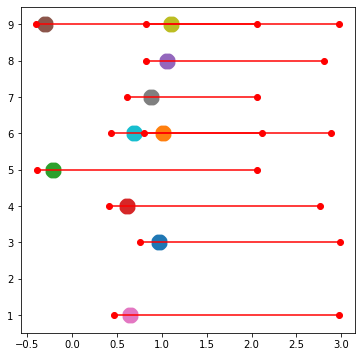

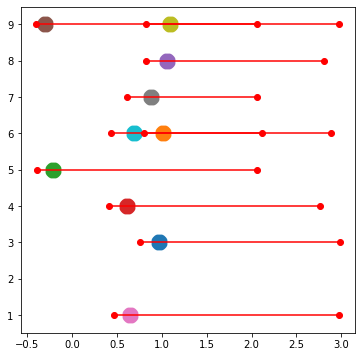

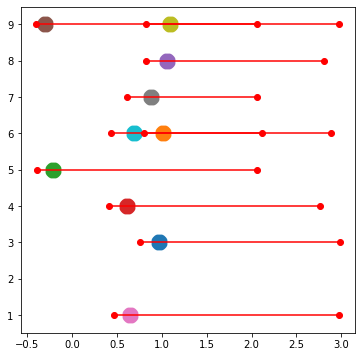

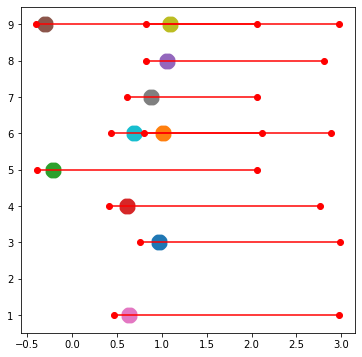

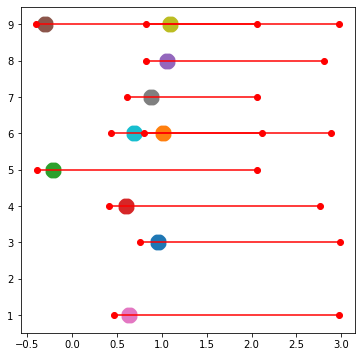

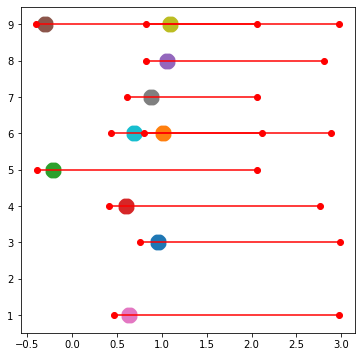

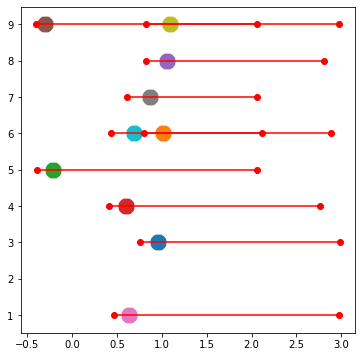

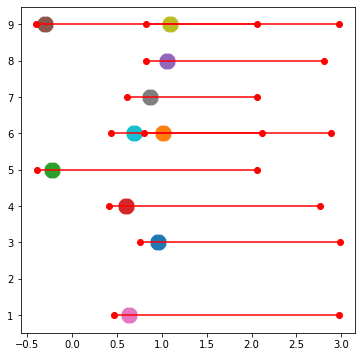

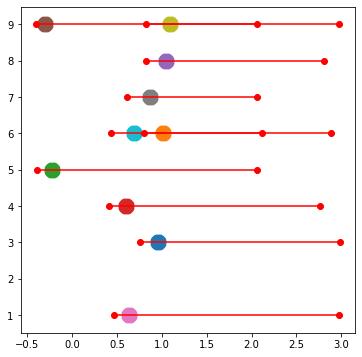

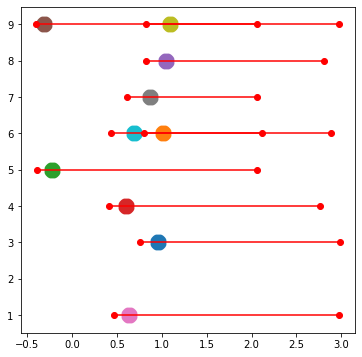

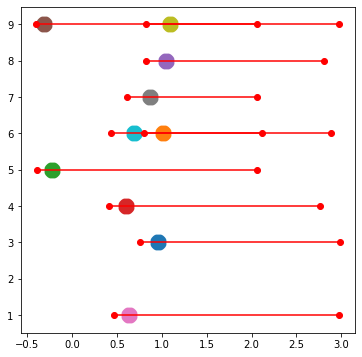

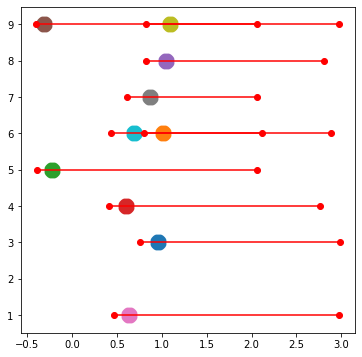

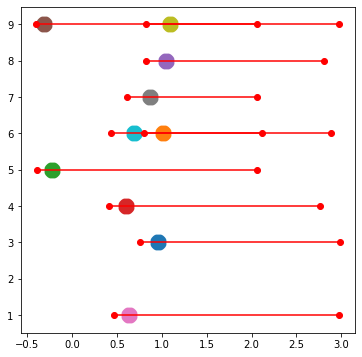

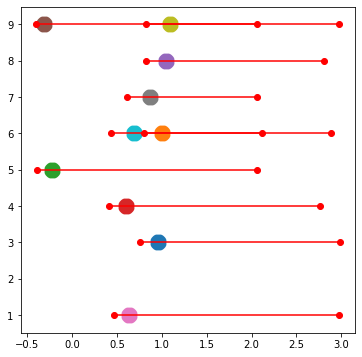

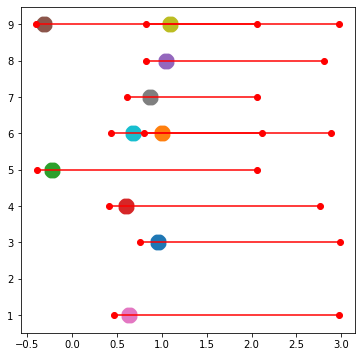

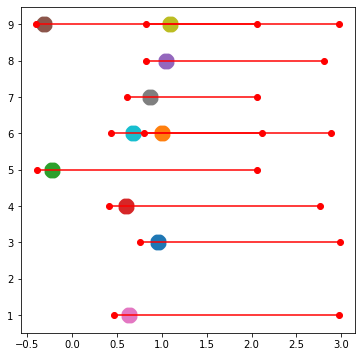

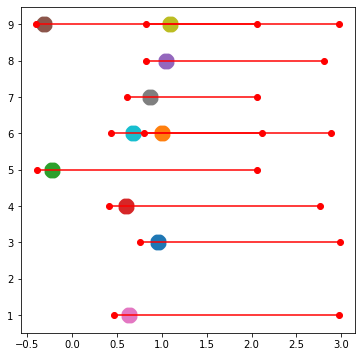

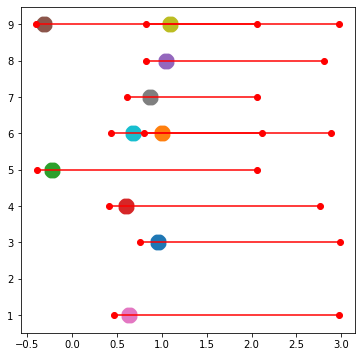

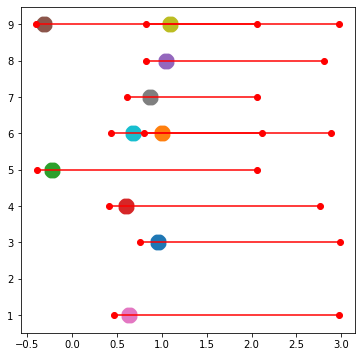

In [25]:
criterion = nn.CrossEntropyLoss()
optimizer_where = optim.SGD(where.parameters(), lr=0.01, momentum=0.9)
optimizer_what = optim.SGD(what.parameters(), lr=0.01, momentum=0.9)

nos_epochs = 60

train_loss=[]

train_acc = [] 
ig = np.random.randint(0,250)
for epoch in range(nos_epochs):  # loop over the dataset multiple times
    
    running_loss = 0.0
    running_acc = 0
    cnt=0
    c = 0
    iteration = desired_num // batch
    
    for i, data in  enumerate(train_loader):
        inputs , labels , fore_idx = data
        
        optimizer_what.zero_grad()
        optimizer_where.zero_grad()
        
        avg_inp,alphas = where(inputs)
        
        outputs = what(avg_inp)
        
        _, predicted = torch.max(outputs.data, 1)
        
        
        
        
        # display plots 
        #print(inputs[:10])
        
        if(c==0):
            #p = inputs[:10].numpy()
            #print("kkldsksd",p)
            #print("ddasdas",p[:,0])
            disp_plot(inputs[:10,:],avg_inp[:10],1,labels[:10].numpy()
                      ,predicted[:10].numpy(), alphas[:10,:], fore_idx[:10].numpy())
            c+=1
            
        loss = criterion(outputs, labels) 
        loss.backward() 
        
        optimizer_what.step()
        optimizer_where.step() 
        

        running_loss += loss.item()
        running_acc+=sum(predicted.cpu().numpy()== labels.cpu().numpy())
        
        if cnt % 4 == 3:    # print every 6 mini-batches
            print('[%d, %5d] loss: %.3f' %(epoch + 1, cnt + 1, running_loss/4 ))
            print('[%d,%5d] accuracy: %.3f' %(epoch + 1, cnt+1,running_acc/1000))
            
            train_loss.append(running_loss)
            train_acc.append(running_acc /1000)
            running_loss = 0.0
            running_acc = 0
            torch.save(where.state_dict(),"weight_elemental/where_model_epoch"+str(epoch)+".pt")
            torch.save(what.state_dict(),"weight_elemental/what_model_epoch"+str(epoch)+".pt")
        cnt=cnt+1
        
print('Finished Training')
torch.save(where.state_dict(),"weight_elemental/where_model_epoch"+str(nos_epochs)+".pt")
torch.save(what.state_dict(),"weight_elemental/what_model_epoch"+str(epoch)+".pt")       
        
        
        

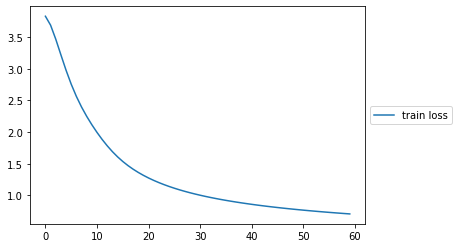

In [26]:
plt.plot(train_loss,label = "train loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

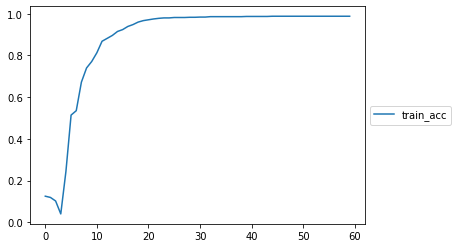

In [27]:
plt.plot(train_acc,label ="train_acc")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))